In [1]:
# Rates of Death with vax
#  https://data.cdc.gov/Public-Health-Surveillance/Rates-of-COVID-19-Cases-or-Deaths-by-Age-Group-and/3rge-nu2a

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geobr


pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 10)  # ao invés de none pode por INT do limite
#pd.set_option('display.max_colwidth', None)

df_faixa = pd.read_csv('../data/faixa_etaria_municipio.csv')
df_ox = pd.read_csv('../data/OxCGRT_Brazil_latest.csv', low_memory=False)


In [2]:
df_ox.dropna(axis=0, how='any', subset=['CityCode'], inplace=True)

df_cases_death = df_ox.loc[:,['CityCode', 'ConfirmedCases', 'ConfirmedDeaths']]

df_cases_death = df_cases_death.groupby(by=['CityCode']).max().reset_index()

df_cases_death[df_cases_death['ConfirmedDeaths'] == df_cases_death['ConfirmedDeaths'].max()]

,CityCode,ConfirmedCases,ConfirmedDeaths
40,BR_3550308,976214.0,39352.0


In [3]:
# Removerei 'sexo' porque, a princípio, não faz diferença no peso das mortes

df_cases_death.rename(columns={'CityCode':'CodMun'}, inplace=True)

df_faixa.loc[:,'CodEst'] = df_faixa['CodEst'].apply(str)

df_faixa.drop(columns=['Sexo'], inplace=True)

df = df_faixa.groupby(['CodMun','CodEst','NomeDoEstado','NomeDoMunicipio']).sum().reset_index()

df = df.merge(df_cases_death, on='CodMun')

In [4]:
# df[df['NomeDoMunicipio'] == 'Curitiba']

df['TotalHabitantes'] = df.iloc[:,4:-2].aggregate(axis=1,func=np.sum)

df['De 5 a 14 anos']  = df['De 5 a 9 anos'] + df['De 10 a 14 anos']
df['De 15 a 24 anos'] = df['De 15 a 19 anos'] + df['De 20 a 24 anos']
df['De 25 a 34 anos'] = df['De 25 a 29 anos'] + df['De 30 a 34 anos']
df['De 35 a 44 anos'] = df['De 35 a 39 anos'] + df['De 40 a 44 anos']
df['De 45 a 54 anos'] = df['De 45 a 49 anos'] + df['De 50 a 54 anos']
df['De 55 a 64 anos'] = df['De 55 a 59 anos'] + df['De 60 a 64 anos']
df['De 65 a 74 anos'] = df['De 65 a 69 anos'] + df['De 70 a 74 anos']
df['De 75 anos ou mais'] = df['De 75 a 79 anos'] + df['De 80 anos ou mais']

df.drop(columns=['De 5 a 9 anos','De 10 a 14 anos',
'De 15 a 19 anos','De 20 a 24 anos',
'De 25 a 29 anos','De 30 a 34 anos',
'De 35 a 39 anos','De 40 a 44 anos',
'De 45 a 49 anos','De 50 a 54 anos',
'De 55 a 59 anos','De 60 a 64 anos',
'De 65 a 69 anos','De 70 a 74 anos',
'De 75 a 79 anos', 'De 80 anos ou mais'], inplace=True)

df


,CodMun,CodEst,NomeDoEstado,NomeDoMunicipio,De 0 a 4 anos,ConfirmedCases,ConfirmedDeaths,TotalHabitantes,De 5 a 14 anos,De 15 a 24 anos,De 25 a 34 anos,De 35 a 44 anos,De 45 a 54 anos,De 55 a 64 anos,De 65 a 74 anos,De 75 anos ou mais
0,BR_1100122,11,Rondônia,Ji-Paraná,9340,20399.0,610.0,130009,19290,21088,22439,20398,16343,11942,6129,3040
1,BR_1100205,11,Rondônia,Porto Velho,40615,86593.0,2510.0,539354,82088,96761,100990,88911,62088,41886,18415,7600
2,BR_1200203,12,Acre,Cruzeiro do Sul,8776,7903.0,168.0,89072,18320,18174,14530,12295,7667,4584,2779,1947
3,BR_1200401,12,Acre,Rio Branco,31122,38206.0,1090.0,413418,72485,82213,70770,63302,43250,27205,14846,8225
4,BR_1302603,13,Amazonas,Manaus,173066,206015.0,9504.0,2219580,378486,411118,383323,354773,246929,154338,78651,38896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,BR_5103403,51,Mato Grosso,Cuiabá,43237,128771.0,3665.0,617848,88638,89717,104113,104999,78507,59536,32817,16284
50,BR_5107602,51,Mato Grosso,Rondonópolis,17785,44021.0,974.0,236067,35665,35460,41104,38627,30231,20304,10941,5950
51,BR_5201405,52,Goiás,Aparecida de Goiânia,47599,97514.0,1780.0,590146,91548,100838,105886,95674,70006,45310,22762,10523
52,BR_5208707,52,Goiás,Goiânia,94476,212948.0,6917.0,1536097,206782,223930,261063,264780,196469,148534,90432,49631


In [5]:

col_names = [
    ['De 0 a 4 anos', 0.00038],
    ['De 5 a 14 anos', 0.00031],
    ['De 15 a 24 anos', 0.00264],
    ['De 25 a 34 anos', 0.01112],
    ['De 35 a 44 anos', 0.02770],
    ['De 45 a 54 anos', 0.06675],
    ['De 55 a 64 anos', 0.14701],
    ['De 65 a 74 anos', 0.22999],
    ['De 75 anos ou mais', 0.51411]
]

# até 54 anos é jovem calcular porcentagem

for col, rate in col_names:
    df['Weighted Rate ' + col] = \
        df.apply(lambda row: row['ConfirmedDeaths'] * rate / row[col] * 100000 \
            * row[col] / row['TotalHabitantes'] \
                , axis=1)

df

,CodMun,CodEst,NomeDoEstado,NomeDoMunicipio,De 0 a 4 anos,ConfirmedCases,ConfirmedDeaths,TotalHabitantes,De 5 a 14 anos,De 15 a 24 anos,De 25 a 34 anos,De 35 a 44 anos,De 45 a 54 anos,De 55 a 64 anos,De 65 a 74 anos,De 75 anos ou mais,Weighted Rate De 0 a 4 anos,Weighted Rate De 5 a 14 anos,Weighted Rate De 15 a 24 anos,Weighted Rate De 25 a 34 anos,Weighted Rate De 35 a 44 anos,Weighted Rate De 45 a 54 anos,Weighted Rate De 55 a 64 anos,Weighted Rate De 65 a 74 anos,Weighted Rate De 75 anos ou mais
0,BR_1100122,11,Rondônia,Ji-Paraná,9340,20399.0,610.0,130009,19290,21088,22439,20398,16343,11942,6129,3040,0.178295,0.145451,1.238683,5.217485,12.996793,31.318986,68.976840,107.910914,241.219531
1,BR_1100205,11,Rondônia,Porto Velho,40615,86593.0,2510.0,539354,82088,96761,100990,88911,62088,41886,18415,7600,0.176841,0.144265,1.228581,5.174931,12.890792,31.063550,68.414270,107.030800,239.252161
2,BR_1200203,12,Acre,Cruzeiro do Sul,8776,7903.0,168.0,89072,18320,18174,14530,12295,7667,4584,2779,1947,0.071672,0.058470,0.497934,2.097359,5.224537,12.589815,27.727771,43.378750,96.967038
3,BR_1200401,12,Acre,Rio Branco,31122,38206.0,1090.0,413418,72485,82213,70770,63302,43250,27205,14846,8225,0.100189,0.081733,0.696051,2.931851,7.303262,17.599016,38.760020,60.638168,135.548017
4,BR_1302603,13,Amazonas,Manaus,173066,206015.0,9504.0,2219580,378486,411118,383323,354773,246929,154338,78651,38896,0.162712,0.132739,1.130419,4.761463,11.860839,28.581624,62.948082,98.479215,220.136307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,BR_5103403,51,Mato Grosso,Cuiabá,43237,128771.0,3665.0,617848,88638,89717,104113,104999,78507,59536,32817,16284,0.225411,0.183888,1.566016,6.596250,16.431307,39.595297,87.204563,136.427301,304.963867
50,BR_5107602,51,Mato Grosso,Rondonópolis,17785,44021.0,974.0,236067,35665,35460,41104,38627,30231,20304,10941,5950,0.156786,0.127904,1.089250,4.588053,11.428874,27.540698,60.655551,94.892662,212.119076
51,BR_5201405,52,Goiás,Aparecida de Goiânia,47599,97514.0,1780.0,590146,91548,100838,105886,95674,70006,45310,22762,10523,0.114616,0.093502,0.796278,3.354017,8.354882,20.133153,44.341197,69.369648,155.066001
52,BR_5208707,52,Goiás,Goiânia,94476,212948.0,6917.0,1536097,206782,223930,261063,264780,196469,148534,90432,49631,0.171113,0.139592,1.188784,5.007304,12.473229,30.057330,66.198174,103.563826,231.502234


In [6]:
df['Weighted Death Rate per 100k'] = df.iloc[:,-9:].aggregate(axis=1,func=np.sum)

df

,CodMun,CodEst,NomeDoEstado,NomeDoMunicipio,De 0 a 4 anos,ConfirmedCases,ConfirmedDeaths,TotalHabitantes,De 5 a 14 anos,De 15 a 24 anos,De 25 a 34 anos,De 35 a 44 anos,De 45 a 54 anos,De 55 a 64 anos,De 65 a 74 anos,De 75 anos ou mais,Weighted Rate De 0 a 4 anos,Weighted Rate De 5 a 14 anos,Weighted Rate De 15 a 24 anos,Weighted Rate De 25 a 34 anos,Weighted Rate De 35 a 44 anos,Weighted Rate De 45 a 54 anos,Weighted Rate De 55 a 64 anos,Weighted Rate De 65 a 74 anos,Weighted Rate De 75 anos ou mais,Weighted Death Rate per 100k
0,BR_1100122,11,Rondônia,Ji-Paraná,9340,20399.0,610.0,130009,19290,21088,22439,20398,16343,11942,6129,3040,0.178295,0.145451,1.238683,5.217485,12.996793,31.318986,68.976840,107.910914,241.219531,469.202978
1,BR_1100205,11,Rondônia,Porto Velho,40615,86593.0,2510.0,539354,82088,96761,100990,88911,62088,41886,18415,7600,0.176841,0.144265,1.228581,5.174931,12.890792,31.063550,68.414270,107.030800,239.252161,465.376191
2,BR_1200203,12,Acre,Cruzeiro do Sul,8776,7903.0,168.0,89072,18320,18174,14530,12295,7667,4584,2779,1947,0.071672,0.058470,0.497934,2.097359,5.224537,12.589815,27.727771,43.378750,96.967038,188.613347
3,BR_1200401,12,Acre,Rio Branco,31122,38206.0,1090.0,413418,72485,82213,70770,63302,43250,27205,14846,8225,0.100189,0.081733,0.696051,2.931851,7.303262,17.599016,38.760020,60.638168,135.548017,263.658307
4,BR_1302603,13,Amazonas,Manaus,173066,206015.0,9504.0,2219580,378486,411118,383323,354773,246929,154338,78651,38896,0.162712,0.132739,1.130419,4.761463,11.860839,28.581624,62.948082,98.479215,220.136307,428.193399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,BR_5103403,51,Mato Grosso,Cuiabá,43237,128771.0,3665.0,617848,88638,89717,104113,104999,78507,59536,32817,16284,0.225411,0.183888,1.566016,6.596250,16.431307,39.595297,87.204563,136.427301,304.963867,593.193900
50,BR_5107602,51,Mato Grosso,Rondonópolis,17785,44021.0,974.0,236067,35665,35460,41104,38627,30231,20304,10941,5950,0.156786,0.127904,1.089250,4.588053,11.428874,27.540698,60.655551,94.892662,212.119076,412.598855
51,BR_5201405,52,Goiás,Aparecida de Goiânia,47599,97514.0,1780.0,590146,91548,100838,105886,95674,70006,45310,22762,10523,0.114616,0.093502,0.796278,3.354017,8.354882,20.133153,44.341197,69.369648,155.066001,301.623293
52,BR_5208707,52,Goiás,Goiânia,94476,212948.0,6917.0,1536097,206782,223930,261063,264780,196469,148534,90432,49631,0.171113,0.139592,1.188784,5.007304,12.473229,30.057330,66.198174,103.563826,231.502234,450.301587


In [7]:
# Define a porcentagem de cada categoria etaria

aux = ['De 0 a 4 anos','De 5 a 14 anos', \
    'De 15 a 24 anos','De 25 a 34 anos','De 35 a 44 anos',\
        'De 45 a 54 anos','De 55 a 64 anos','De 65 a 74 anos','De 75 anos ou mais']

for c in aux:
    df[c[3:]] = df.apply(lambda x: x[c]/x['TotalHabitantes'] * 100, axis=1)

df.sort_values('Weighted Death Rate per 100k', ascending=False)


,CodMun,CodEst,NomeDoEstado,NomeDoMunicipio,De 0 a 4 anos,ConfirmedCases,ConfirmedDeaths,TotalHabitantes,De 5 a 14 anos,De 15 a 24 anos,De 25 a 34 anos,De 35 a 44 anos,De 45 a 54 anos,De 55 a 64 anos,De 65 a 74 anos,De 75 anos ou mais,Weighted Rate De 0 a 4 anos,Weighted Rate De 5 a 14 anos,Weighted Rate De 15 a 24 anos,Weighted Rate De 25 a 34 anos,Weighted Rate De 35 a 44 anos,Weighted Rate De 45 a 54 anos,Weighted Rate De 55 a 64 anos,Weighted Rate De 65 a 74 anos,Weighted Rate De 75 anos ou mais,Weighted Death Rate per 100k,0 a 4 anos,5 a 14 anos,15 a 24 anos,25 a 34 anos,35 a 44 anos,45 a 54 anos,55 a 64 anos,65 a 74 anos,75 anos ou mais
49,BR_5103403,51,Mato Grosso,Cuiabá,43237,128771.0,3665.0,617848,88638,89717,104113,104999,78507,59536,32817,16284,0.225411,0.183888,1.566016,6.596250,16.431307,39.595297,87.204563,136.427301,304.963867,593.193900,6.998000,14.346247,14.520885,16.850908,16.994309,12.706523,9.636027,5.311501,2.635600
37,BR_3304557,33,Rio de Janeiro,Rio de Janeiro,406207,484433.0,34102.0,6747815,799622,939078,997381,1055328,870286,771137,535689,373087,0.192044,0.156667,1.334199,5.619808,13.998982,33.734009,74.295680,116.231980,259.820093,505.383461,6.019830,11.850088,13.916772,14.780799,15.639551,12.897301,11.427951,7.938703,5.529005
0,BR_1100122,11,Rondônia,Ji-Paraná,9340,20399.0,610.0,130009,19290,21088,22439,20398,16343,11942,6129,3040,0.178295,0.145451,1.238683,5.217485,12.996793,31.318986,68.976840,107.910914,241.219531,469.202978,7.184118,14.837434,16.220416,17.259574,15.689683,12.570668,9.185518,4.714289,2.338300
1,BR_1100205,11,Rondônia,Porto Velho,40615,86593.0,2510.0,539354,82088,96761,100990,88911,62088,41886,18415,7600,0.176841,0.144265,1.228581,5.174931,12.890792,31.063550,68.414270,107.030800,239.252161,465.376191,7.530305,15.219689,17.940165,18.724252,16.484721,11.511549,7.765957,3.414270,1.409093
52,BR_5208707,52,Goiás,Goiânia,94476,212948.0,6917.0,1536097,206782,223930,261063,264780,196469,148534,90432,49631,0.171113,0.139592,1.188784,5.007304,12.473229,30.057330,66.198174,103.563826,231.502234,450.301587,6.150393,13.461520,14.577855,16.995216,17.237193,12.790143,9.669572,5.887128,3.230981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,BR_2803500,28,Sergipe,Lagarto,7370,7864.0,222.0,105221,15070,17868,18046,15429,12965,9147,5633,3693,0.080174,0.065405,0.556999,2.346148,5.844271,14.083215,31.016831,48.524325,108.469241,210.986609,7.004305,14.322236,16.981401,17.150569,14.663423,12.321685,8.693132,5.353494,3.509756
2,BR_1200203,12,Acre,Cruzeiro do Sul,8776,7903.0,168.0,89072,18320,18174,14530,12295,7667,4584,2779,1947,0.071672,0.058470,0.497934,2.097359,5.224537,12.589815,27.727771,43.378750,96.967038,188.613347,9.852703,20.567631,20.403718,16.312646,13.803440,8.607643,5.146398,3.119948,2.185872
11,BR_1600279,16,Amapá,Laranjal do Jari,5167,8401.0,95.0,51362,10222,10762,8763,6858,4595,2950,1316,729,0.070285,0.057338,0.488299,2.056773,5.123438,12.346190,27.191211,42.539329,95.090631,184.963494,10.059967,19.901873,20.953234,17.061252,13.352284,8.946303,5.743546,2.562206,1.419337
31,BR_2910800,29,Bahia,Feira de Santana,40129,59439.0,1074.0,619609,87032,106416,102392,105252,77160,52731,29995,18502,0.065867,0.053734,0.457605,1.927487,4.801383,11.570119,25.481996,39.865344,89.113318,173.336853,6.476504,14.046278,17.174702,16.525260,16.986842,12.453015,8.510367,4.840956,2.986077


In [8]:
df['Tamanho do grupo de risco'] = \
    df.apply(lambda row: row['35 a 44 anos'] + row['45 a 54 anos'] + row['55 a 64 anos'] \
        + row['65 a 74 anos'] \
        + row['75 anos ou mais'], axis=1)

df['Tamanho do grupo de jovens'] = \
    df.apply(lambda row: row['0 a 4 anos'] + row['5 a 14 anos'] + \
        row['15 a 24 anos'] + row['25 a 34 anos'], axis=1)

In [9]:
df.to_csv('../data/faixa_et_mortes.csv', index=False)

<AxesSubplot:>

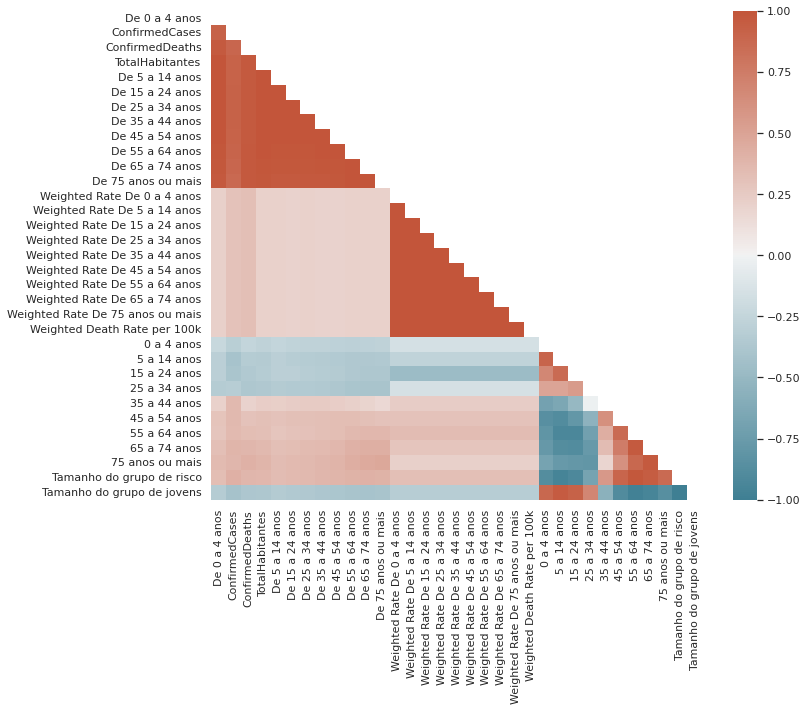

In [10]:
sns.set_theme(style="white")

df_corr = df.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(df_corr, dtype=bool))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(df_corr, center=0, cmap=cmap, mask=mask)


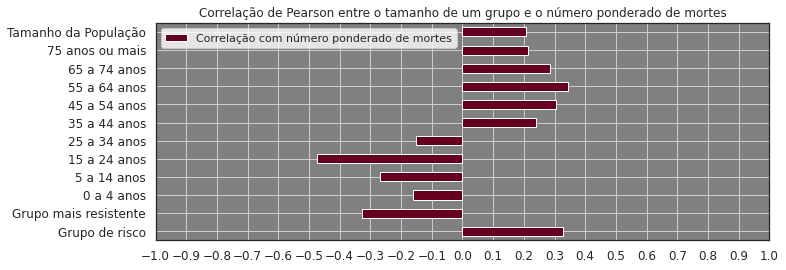

In [11]:
corr = df.loc[:,['Weighted Death Rate per 100k', \
    'Tamanho do grupo de risco', 'Tamanho do grupo de jovens',\
    '0 a 4 anos','5 a 14 anos', \
    '15 a 24 anos','25 a 34 anos','35 a 44 anos',\
        '45 a 54 anos','55 a 64 anos','65 a 74 anos','75 anos ou mais','TotalHabitantes']].corr()

corr1 = pd.DataFrame(corr.loc['Weighted Death Rate per 100k','Tamanho do grupo de risco':])\
    .reset_index()
corr1.rename(columns={'Weighted Death Rate per 100k':'Correlação com número ponderado de mortes'}, inplace=True)

corr1.loc[corr1['index'] == 'Tamanho do grupo de risco','index'] = 'Grupo de risco'
corr1.loc[corr1['index'] == 'Tamanho do grupo de jovens','index'] = 'Grupo mais resistente'
corr1.loc[corr1['index'] == 'TotalHabitantes','index'] = 'Tamanho da População'

corr1.plot(y='Correlação com número ponderado de mortes',x='index', kind='barh',\
    figsize=(11,4),ylim=(-1,1), colormap='RdBu', fontsize=12,\
        grid=True, xticks=np.arange(-1.,1.05,0.1), xlabel='', title='Correlação de Pearson entre o tamanho de um grupo e o número ponderado de mortes')\
            .set_facecolor('gray')

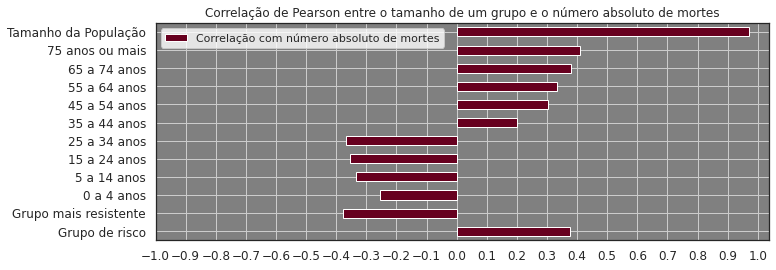

In [12]:
corr = df.loc[:,['ConfirmedDeaths', \
    'Tamanho do grupo de risco', 'Tamanho do grupo de jovens',\
    '0 a 4 anos','5 a 14 anos', \
    '15 a 24 anos','25 a 34 anos','35 a 44 anos',\
        '45 a 54 anos','55 a 64 anos','65 a 74 anos','75 anos ou mais','TotalHabitantes']].corr()

corr1 = pd.DataFrame(corr.loc['ConfirmedDeaths','Tamanho do grupo de risco':])\
    .reset_index()

corr1.rename(columns={'ConfirmedDeaths':'Correlação com número absoluto de mortes'}, inplace=True)

corr1.loc[corr1['index'] == 'Tamanho do grupo de risco','index'] = 'Grupo de risco'
corr1.loc[corr1['index'] == 'Tamanho do grupo de jovens','index'] = 'Grupo mais resistente'
corr1.loc[corr1['index'] == 'TotalHabitantes','index'] = 'Tamanho da População'

corr1.plot(y='Correlação com número absoluto de mortes',x='index', kind='barh',\
    figsize=(11,4),ylim=(-1,1), colormap='RdBu', fontsize=12,\
        grid=True, xticks=np.arange(-1,1.05,0.1), xlabel='', \
            title='Correlação de Pearson entre o tamanho de um grupo e o número absoluto de mortes')\
            .set_facecolor('gray')

Text(0, 0.5, '')

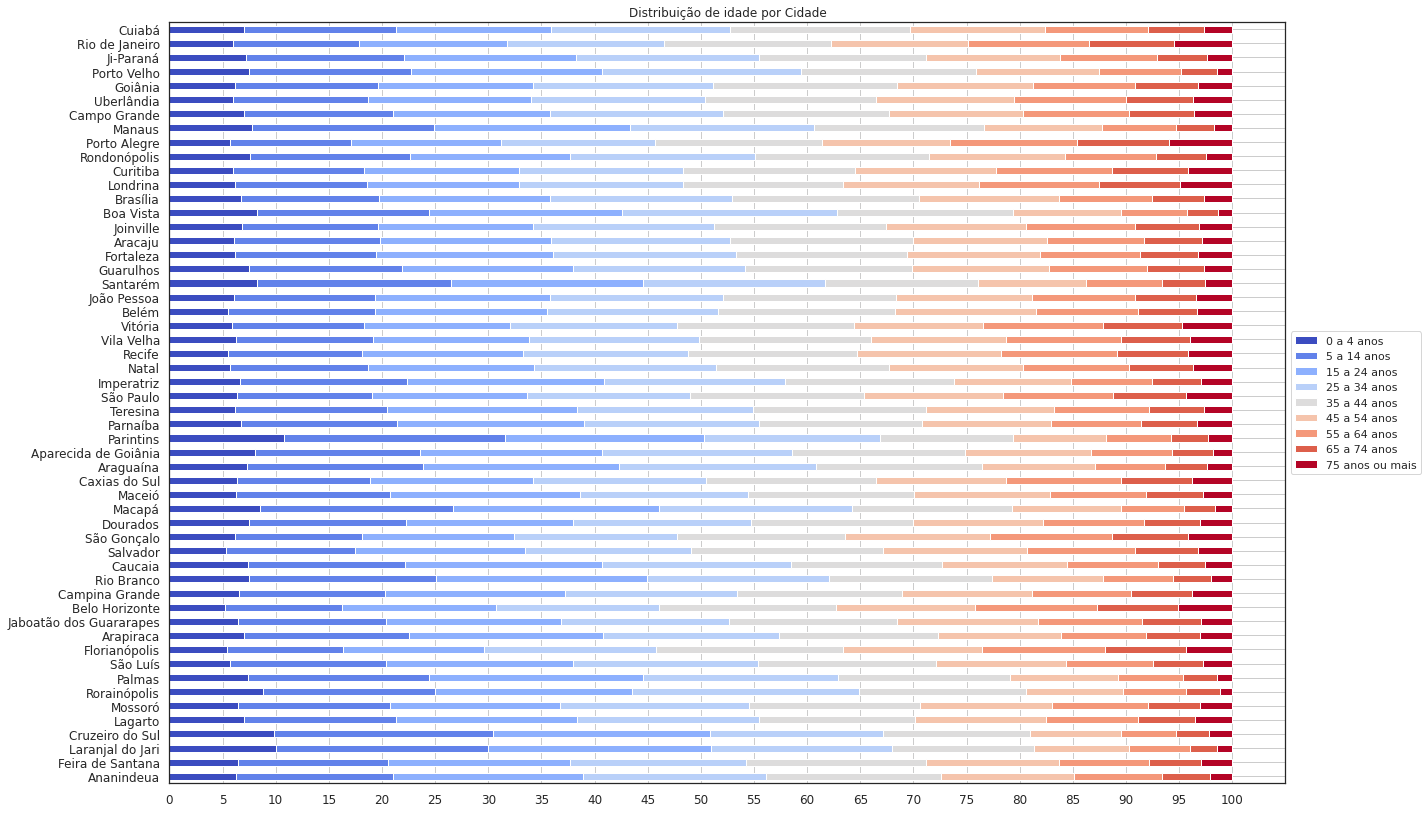

In [13]:
# Lagarto e Cuiaba tem um perfil de idade parecidos e um rate de mortes muito diferente
# que fica bem representado com a distancia entre as cidades (topo te bottom)

aux = df.sort_values('Weighted Death Rate per 100k')
aux.loc[:,['NomeDoMunicipio', '0 a 4 anos','5 a 14 anos', \
    '15 a 24 anos','25 a 34 anos','35 a 44 anos',\
        '45 a 54 anos','55 a 64 anos','65 a 74 anos','75 anos ou mais']]\
            .plot(kind='barh', stacked=True, x='NomeDoMunicipio', grid=True,\
                fontsize=12,figsize=(20,14), xlabel='Nome do Municipio',\
                    title='Distribuição de idade por Cidade', colormap='coolwarm')\
                        .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xticks(range(0,101,5))
plt.ylabel('')

Text(-113.03999999999999, 0.5, '')

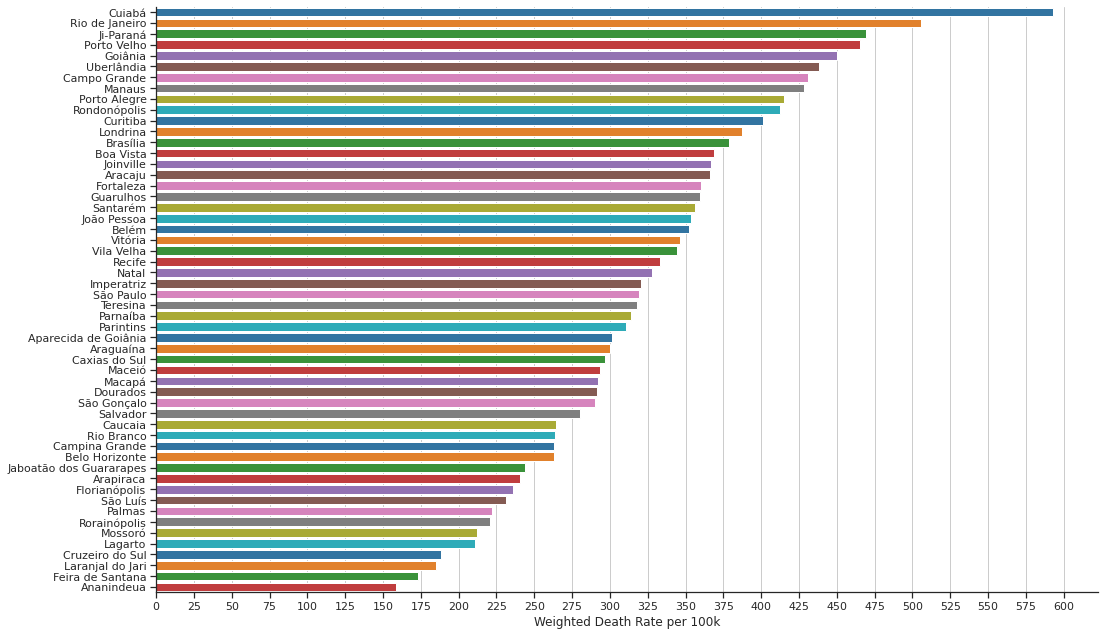

In [14]:
sns.set_style("ticks",{'axes.grid' : True})

sns.catplot(data=df.sort_values('Weighted Death Rate per 100k', ascending=False),\
    y='NomeDoMunicipio',x='Weighted Death Rate per 100k',\
        kind='bar', height=9, aspect=1.75, orient='h', palette='tab10')
        
        
plt.xticks(range(0,601,25))
plt.ylabel('')

In [15]:
df['Weighted Death Rate per 100k'].describe()

count     54.000000
mean     324.367095
std       89.572339
min      158.531089
25%      263.339130
50%      318.615622
75%      368.173999
max      593.193900
Name: Weighted Death Rate per 100k, dtype: float64

In [16]:
mapaux_state = df.loc[:,['Weighted Death Rate per 100k', 'CodEst']].groupby('CodEst').sum().reset_index()

mapaux_state['CodEst'] = mapaux_state['CodEst'].astype(int)

In [17]:
mapaux = pd.DataFrame(df['CodMun'].apply(lambda x: int(x[3:])))

mapaux['Mortes'] = df['Weighted Death Rate per 100k']

mapaux

,CodMun,Mortes
0,1100122,469.202978
1,1100205,465.376191
2,1200203,188.613347
3,1200401,263.658307
4,1302603,428.193399
...,...,...
49,5103403,593.193900
50,5107602,412.598855
51,5201405,301.623293
52,5208707,450.301587


In [18]:
states = geobr.read_state(year=2019)
reg = geobr.read_region(year = 2019)
br = geobr.read_municipality(
  code_muni = "all",
  year = 2019
)


/home/dvieira/.local/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/home/dvieira/.local/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/home/dvieira/.local/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/home/dvieira/.local/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecation

In [19]:
br['code_muni'] = br['code_muni'].astype(int)
states['code_state'] = states['code_state'].astype(int)


br.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,1100015,Alta Floresta D'oeste,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.22630 -11.89037, -62.20670..."
1,1100023,Ariquemes,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.58751 -9.84984, -63.58542 ..."
2,1100031,Cabixi,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-60.71834 -13.39058, -60.70904..."
3,1100049,Cacoal,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.50114 -11.30119, -61.50080..."
4,1100056,Cerejeiras,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.51346 -13.28575, -61.52479..."


In [20]:
states.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.37916..."
1,12,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.08554 ..."
2,13,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.71230 ..."
3,14,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2..."
4,15,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42843 ..."


In [21]:
braux = br.merge(mapaux, how="left", left_on="code_muni", right_on="CodMun")
braux.drop(columns=['CodMun'], inplace=True)


In [22]:
states = states.merge(how='left', right=mapaux_state, left_on='code_state', right_on='CodEst')

In [23]:
braux.dropna(how='any',axis=0)

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry,Mortes
11,1100122,Ji-Paraná,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.10290 -10.85099, -61.96047...",469.202978
16,1100205,Porto Velho,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-64.15566 -8.84833, -64.15820 ...",465.376191
57,1200203,Cruzeiro Do Sul,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-72.80077 -7.66295, -72.79151 ...",188.613347
66,1200401,Rio Branco,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-68.72516 -9.90848, -68.69439 ...",263.658307
111,1302603,Manaus,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-59.99379 -2.56444, -59.98970 ...",428.193399
...,...,...,...,...,...,...,...,...,...
5221,5103403,Cuiabá,51.0,MT,Mato Grosso,5.0,Centro Oeste,"MULTIPOLYGON (((-56.01803 -15.09612, -56.00309...",593.193900
5297,5107602,Rondonópolis,51.0,MT,Mato Grosso,5.0,Centro Oeste,"MULTIPOLYGON (((-54.97101 -16.46795, -54.97224...",412.598855
5343,5201405,Aparecida De Goiânia,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-49.34914 -16.76469, -49.33850...",301.623293
5419,5208707,Goiânia,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-49.25743 -16.50184, -49.25359...",450.301587


In [24]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(22, 22), dpi=600)

reg.plot(edgecolor="#333333", ax=ax, facecolor='white', linewidth=2, alpha=1)

states.plot(
    column='Weighted Death Rate per 100k',
    edgecolor="#444444",
    linewidth=0,
    cmap="coolwarm",
    ax=ax,
    alpha=.6,
    legend=True,
    legend_kwds={
        "label": "Número ponderado de mortes por estado",
        "shrink": 0.4,
        "orientation":'horizontal'
    }
)
braux.plot(
    column="Mortes",
    edgecolor="orange",
    cmap="hot_r",
    legend=True,
    legend_kwds={
        "label": "Número ponderado de mortes nas cidades avaliadas",
        "shrink": 0.4,
        "orientation":'horizontal'
    },
    ax=ax,
)

ax.set_title("Mortes por Covid-19 pelo Brasil", fontsize=26)
ax.axis("off")

ImportError: The descartes package is required for plotting polygons in geopandas. You can install it using 'conda install -c conda-forge descartes' or 'pip install descartes'.